In [9]:
# 📦 Mobile Payments ETL Pipeline
# Author: [Your Name]
# Date: [Today's Date]

# -------------------------------------------------------------
# 1. Importing Libraries
# -------------------------------------------------------------
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

# Set style for plots
sns.set(style="whitegrid")

In [11]:
# -------------------------------------------------------------
# 2. Define File Paths and Settings
# -------------------------------------------------------------

csv_file_path = 'mobile_payments.csv'     # Input CSV
database_file_path = 'mobile_payments.db' # Output SQLite DB
table_name = 'mobile_payments'            # Table name inside DB

In [13]:
# -------------------------------------------------------------
# 3. Extract Data from CSV
# -------------------------------------------------------------
print("📥 Extracting data from CSV...")

if not os.path.exists(csv_file_path):
    raise Exception(f"❌ ERROR: CSV file '{csv_file_path}' does not exist.")

# Read the CSV
df = pd.read_csv(csv_file_path)

print(f"✅ Successfully loaded data. Shape: {df.shape}")
display(df.head())


📥 Extracting data from CSV...
✅ Successfully loaded data. Shape: (216, 6)


,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
0,2025,February,394853,84.56,267.88,636.21
1,2025,January,382873,83.40,294.62,697.51
2,2024,December,381116,82.43,309.28,753.45
3,2024,November,383624,81.55,297.02,707.27
4,2024,October,358621,80.82,215.26,722.28


In [15]:
# -------------------------------------------------------------
# 4. Transforming the Data
# -------------------------------------------------------------
print("\n🔧 Transforming data...")

# 4.1 Data Type Conversion
print("- Converting data types...")
df['Year'] = df['Year'].astype(int)
df['Active Agents'] = df['Active Agents'].astype(int)
df['Total Registered Mobile Money Accounts (Millions)'] = df['Total Registered Mobile Money Accounts (Millions)'].astype(float)
df['Total Agent Cash in Cash Out (Volume Million)'] = df['Total Agent Cash in Cash Out (Volume Million)'].astype(float)
df['Total Agent Cash in Cash Out (Value KSh billions)'] = df['Total Agent Cash in Cash Out (Value KSh billions)'].astype(float)



🔧 Transforming data...
- Converting data types...


In [17]:
# 4.2 Handling Missing Values
print("- Dropping rows with missing values...")
initial_rows = df.shape[0]
df = df.dropna()
final_rows = df.shape[0]
print(f"✅ Dropped {initial_rows - final_rows} rows with missing values.")

- Dropping rows with missing values...
✅ Dropped 0 rows with missing values.


In [19]:
# 4.3 Feature Engineering: Create 'Date' column
print("- Creating 'Date' column...")
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01', format='%Y-%B-%d')

# Rearranging columns
df = df[['Date', 'Year', 'Month', 'Active Agents', 
         'Total Registered Mobile Money Accounts (Millions)', 
         'Total Agent Cash in Cash Out (Volume Million)', 
         'Total Agent Cash in Cash Out (Value KSh billions)']]

display(df.head())

- Creating 'Date' column...


,Date,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
0,2025-02-01,2025,February,394853,84.56,267.88,636.21
1,2025-01-01,2025,January,382873,83.40,294.62,697.51
2,2024-12-01,2024,December,381116,82.43,309.28,753.45
3,2024-11-01,2024,November,383624,81.55,297.02,707.27
4,2024-10-01,2024,October,358621,80.82,215.26,722.28


In [21]:
# -------------------------------------------------------------
# 5. Loading Data into SQLite Database
# -------------------------------------------------------------
print("\n🛢️ Loading data into SQLite database...")

# Connect to the database (create if doesn't exist)
conn = sqlite3.connect(database_file_path)
cursor = conn.cursor()

# Drop table if already exists
cursor.execute(f"DROP TABLE IF EXISTS {table_name}")

# Load DataFrame into SQL table
df.to_sql(table_name, conn, if_exists='replace', index=False)

conn.commit()
conn.close()

print(f"✅ Data successfully loaded into '{database_file_path}' table '{table_name}'.")


🛢️ Loading data into SQLite database...
✅ Data successfully loaded into 'mobile_payments.db' table 'mobile_payments'.


In [23]:
# -------------------------------------------------------------
# 6. Validation Step
# -------------------------------------------------------------
print("\n🔍 Validating data...")

conn = sqlite3.connect(database_file_path)
query = f"SELECT COUNT(*) FROM {table_name}"
row_count = conn.execute(query).fetchone()[0]

if row_count == df.shape[0]:
    print(f"✅ Validation passed: {row_count} rows correctly loaded.")
else:
    print(f"❌ Validation failed: Mismatch in row counts!")

conn.close()


🔍 Validating data...
✅ Validation passed: 216 rows correctly loaded.



📊 Generating visualizations...


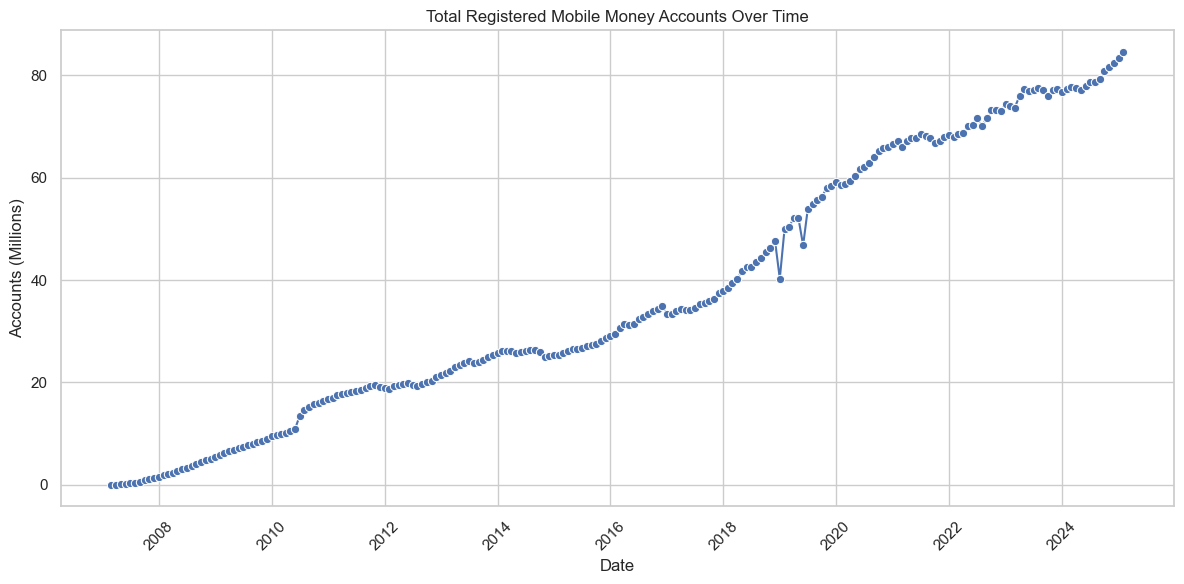

In [25]:
# -------------------------------------------------------------
# 7. Data Analysis and Visualization
# -------------------------------------------------------------
print("\n📊 Generating visualizations...")

# 7.1 Trend of Total Registered Accounts
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Total Registered Mobile Money Accounts (Millions)', marker="o")
plt.title('Total Registered Mobile Money Accounts Over Time')
plt.xlabel('Date')
plt.ylabel('Accounts (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

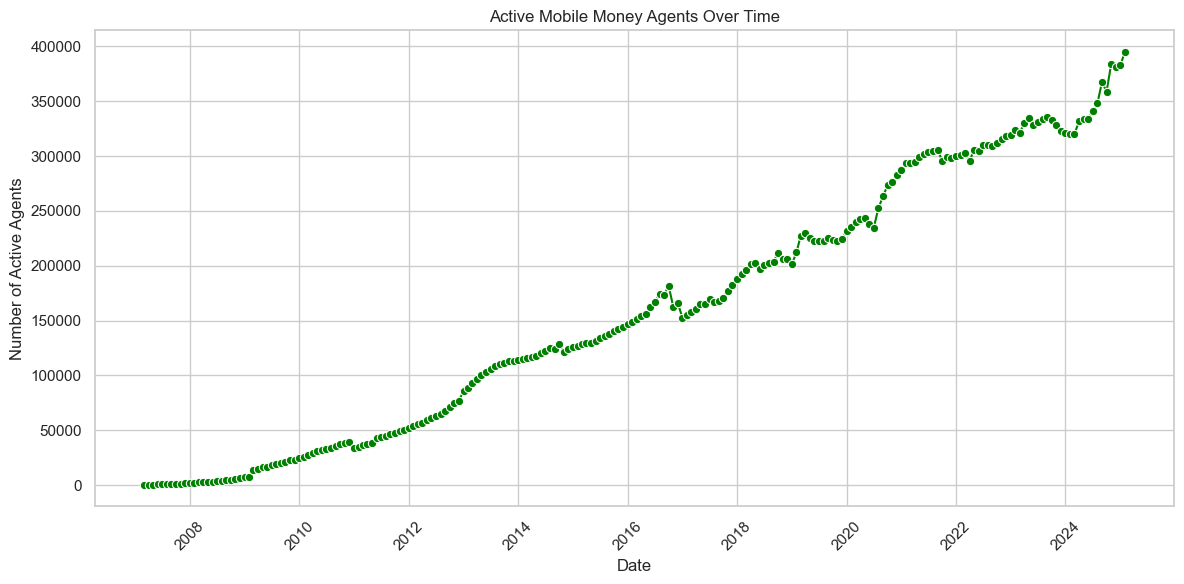

In [27]:
# 7.2 Active Agents Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Active Agents', color='green', marker="o")
plt.title('Active Mobile Money Agents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Agents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

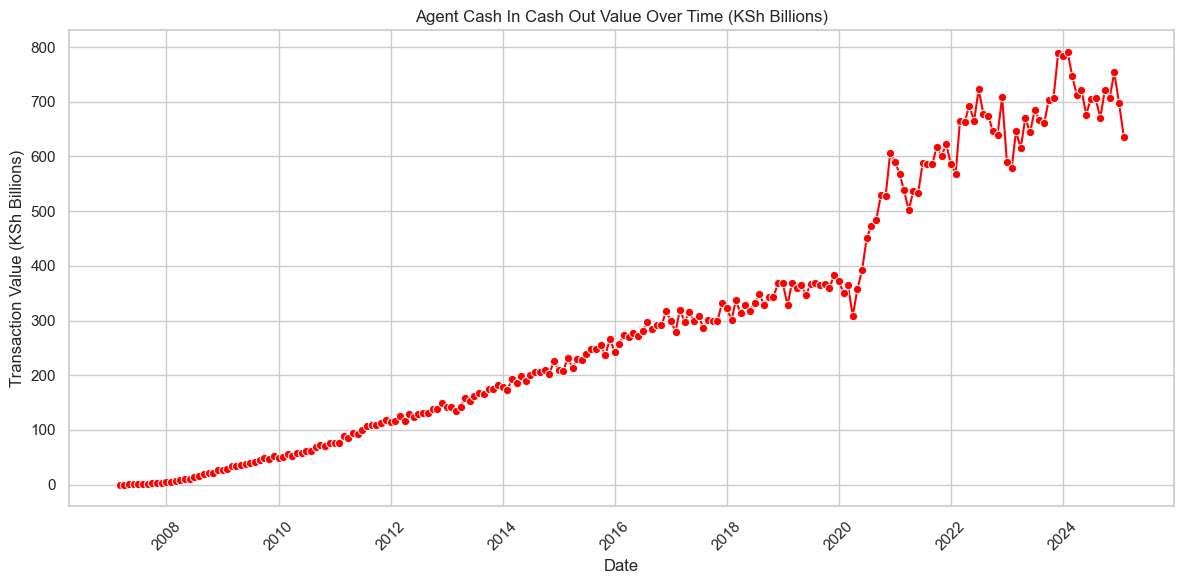

In [29]:
# 7.3 Cash In Cash Out Value Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Total Agent Cash in Cash Out (Value KSh billions)', color='red', marker="o")
plt.title('Agent Cash In Cash Out Value Over Time (KSh Billions)')
plt.xlabel('Date')
plt.ylabel('Transaction Value (KSh Billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# -------------------------------------------------------------
# 8. Save Success Log
# -------------------------------------------------------------
timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with open('etl_log.txt', 'a') as f:
    f.write(f"[{timestamp}] ETL pipeline completed successfully. Loaded {row_count} rows into {database_file_path}\n")

print("\n📝 Log file updated: etl_log.txt")
print("\n🎉 ETL Automation Complete!")


📝 Log file updated: etl_log.txt

🎉 ETL Automation Complete!
